In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
df = pd.read_csv('energydata_complete.csv')

In [63]:
df.shape

(19735, 29)

In [64]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [65]:
df = df.drop(columns=['date', 'lights'])

In [66]:
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [67]:
#preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [68]:
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [69]:
normalized_df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.046729,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [70]:
features_df = normalized_df.drop(columns=['Appliances'])

In [71]:
features_df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [72]:
target = normalized_df['Appliances']

In [73]:
target.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

In [74]:
#modelling
from sklearn.model_selection import train_test_split


In [75]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target, test_size = 0.3, random_state = 42)

In [76]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [77]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [78]:
pred_values = linear_model.predict(x_test)

In [79]:
pred_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [84]:
#metrics
from sklearn.metrics import r2_score

In [85]:
r2_score = r2_score(y_test, pred_values)

In [86]:
round(r2_score, 2)

0.15

In [87]:
from sklearn.metrics import mean_absolute_error

In [88]:
mae = mean_absolute_error(y_test, pred_values)

In [89]:
round(mae, 2)

0.05

In [127]:
from sklearn.metrics import mean_squared_error

In [128]:
mse = mean_squared_error(y_test, pred_values)

In [129]:
round(mse, 3)

0.008

In [130]:
rmse = np.sqrt(mean_squared_error(y_test, pred_values))

In [131]:
round(rmse, 3)

0.088

In [95]:
# get importance or feature weights
feature_weight = linear_model.coef_
# summarize feature weights
for i,v in enumerate(feature_weight):
 print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: -0.00328
Feature: 1, Score: 0.55355
Feature: 2, Score: -0.23618
Feature: 3, Score: -0.45670
Feature: 4, Score: 0.29063
Feature: 5, Score: 0.09605
Feature: 6, Score: 0.02898
Feature: 7, Score: 0.02639
Feature: 8, Score: -0.01566
Feature: 9, Score: 0.01601
Feature: 10, Score: 0.23642
Feature: 11, Score: 0.03805
Feature: 12, Score: 0.01032
Feature: 13, Score: -0.04461
Feature: 14, Score: 0.10200
Feature: 15, Score: -0.15760
Feature: 16, Score: -0.18994
Feature: 17, Score: -0.03980
Feature: 18, Score: -0.32186
Feature: 19, Score: 0.00684
Feature: 20, Score: -0.07767
Feature: 21, Score: 0.02918
Feature: 22, Score: 0.01231
Feature: 23, Score: 0.11776
Feature: 24, Score: 0.00077
Feature: 25, Score: 0.00077


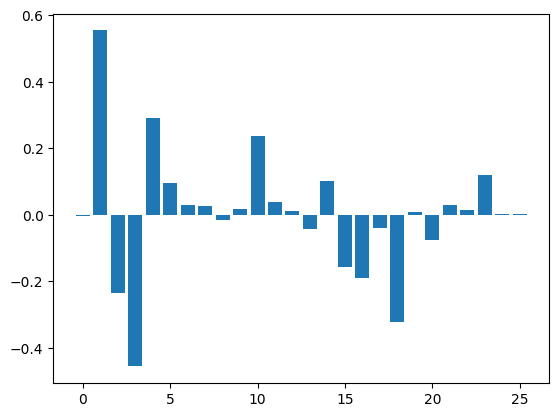

In [97]:
# plot feature weights
from matplotlib import pyplot
pyplot.bar([x for x in range(len(feature_weight))], feature_weight)
pyplot.show()

In [105]:
#regularization
from sklearn.linear_model import Ridge

In [108]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [132]:
rmse_ridge = np.sqrt(mean_squared_error(y_test, pred_values))
rmse_ridge
round(rmse_ridge, 3)

0.088

In [112]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [133]:
rmse_lasso = np.sqrt(mean_squared_error(y_test, pred_values))
round(rmse_lasso, 3)

0.088

In [122]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [125]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear Model Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso Model Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge Model Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
#final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [120]:
print(final_weights)

       Features  Linear Model Weight  Lasso Model Weight_x  \
0          RH_2            -0.456698             -0.000000   
1         T_out            -0.321860              0.000000   
2            T2            -0.236178              0.000000   
3            T9            -0.189941             -0.000000   
4          RH_8            -0.157595             -0.000110   
5        RH_out            -0.077671             -0.049557   
6          RH_7            -0.044614             -0.000000   
7          RH_9            -0.039800             -0.000000   
8            T5            -0.015657             -0.000000   
9            T1            -0.003281              0.000000   
10          rv1             0.000770             -0.000000   
11          rv2             0.000770             -0.000000   
12  Press_mm_hg             0.006839             -0.000000   
13           T7             0.010319             -0.000000   
14   Visibility             0.012307              0.000000   
15      